In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_parquet('data/btc_3month_2021.parquet')

In [3]:
train

,unix_time,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,timestamp
0,1614585600,1,1772.0,46321.781429,46439.000000,46266.50,46341.782857,77.386471,46324.837627,0.000225,2021-03-01 08:00:00+00:00
1,1614585660,1,3906.0,46338.842857,46564.000000,46299.20,46462.357392,126.541446,46405.713512,-0.000073,2021-03-01 08:01:00+00:00
2,1614585720,1,5296.0,46471.749666,46630.112187,46328.49,46449.094286,205.294490,46478.747657,-0.000238,2021-03-01 08:02:00+00:00
3,1614585780,1,2795.0,46464.921429,46603.000000,46378.06,46451.341429,114.631098,46478.074332,0.000281,2021-03-01 08:03:00+00:00
4,1614585840,1,1828.0,46449.978571,46536.000000,46361.31,46423.220000,55.669122,46430.358824,0.000949,2021-03-01 08:04:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
131995,1622505300,1,2297.0,37306.624286,37371.670000,37285.86,37320.044286,59.683761,37328.119321,-0.000614,2021-05-31 23:55:00+00:00
131996,1622505360,1,2080.0,37316.403364,37336.620000,37265.80,37293.093102,59.175643,37295.825650,-0.000593,2021-05-31 23:56:00+00:00
131997,1622505420,1,2957.0,37291.218824,37357.000000,37276.76,37303.409790,104.229560,37306.378838,-0.000735,2021-05-31 23:57:00+00:00
131998,1622505480,1,2136.0,37298.821429,37336.080000,37277.77,37310.207143,54.744085,37303.718998,-0.000536,2021-05-31 23:58:00+00:00


In [4]:
from statsmodels.graphics.tsaplots import plot_acf


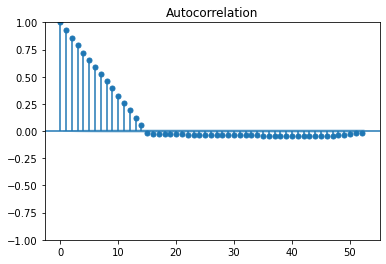

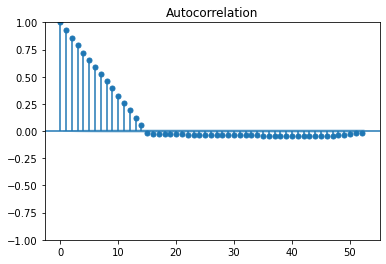

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train["Target"])

NameError: name 'rn' is not defined

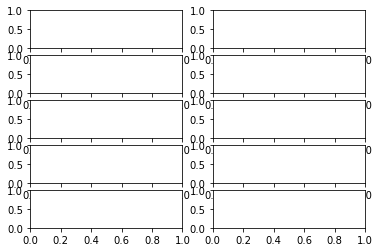

In [11]:
from scipy.signal import welch

fig, axs = plt.subplots(5,2)
font = {'weight' : 'normal',
        'size'   : 8}
plt.rc('font', **font)

for i in range(0,len(rn)):
    ax = plt.subplot(5,2,i+1)
    f,pxx=welch(train.Target.loc[rn[i]],
                return_onesided=True,
                scaling='density')
    ax.plot(f,pxx,label='ID={}'.format(rn[i]))
    plt.legend()
    if i in [8,9]:
        ax.set_xlabel('Frequency')
    if i in range(0,9,2):
        ax.set_ylabel('Pxx')  